<a href="https://colab.research.google.com/github/zafor158/IPL_Score_predictor/blob/main/IPL_Score_Predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IPL Score Prediction Using Machine Learning Algorithmns
IPL.avif


This Machine Learning model adapts a Regression Approach to predict the score of the First Innings of an IPL Match.

Algorithmn used:

1. Decision Tree Regressor
2. Linear Regression
3. Random Forest Regression





##About the data set
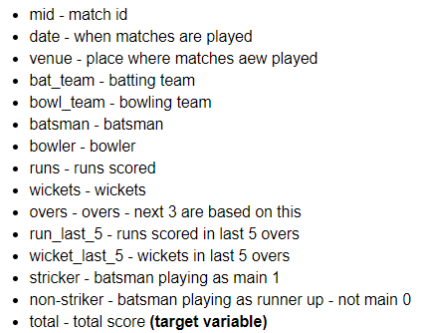



In ipl season 2008 to 2020, all the data are avaiable for prediction in our project. Specially, we shown how machine learning algorithmns are used in the field of cricket. Here ,we worked for the score prediction of the first innings.

##In Our Project,What we actually do?
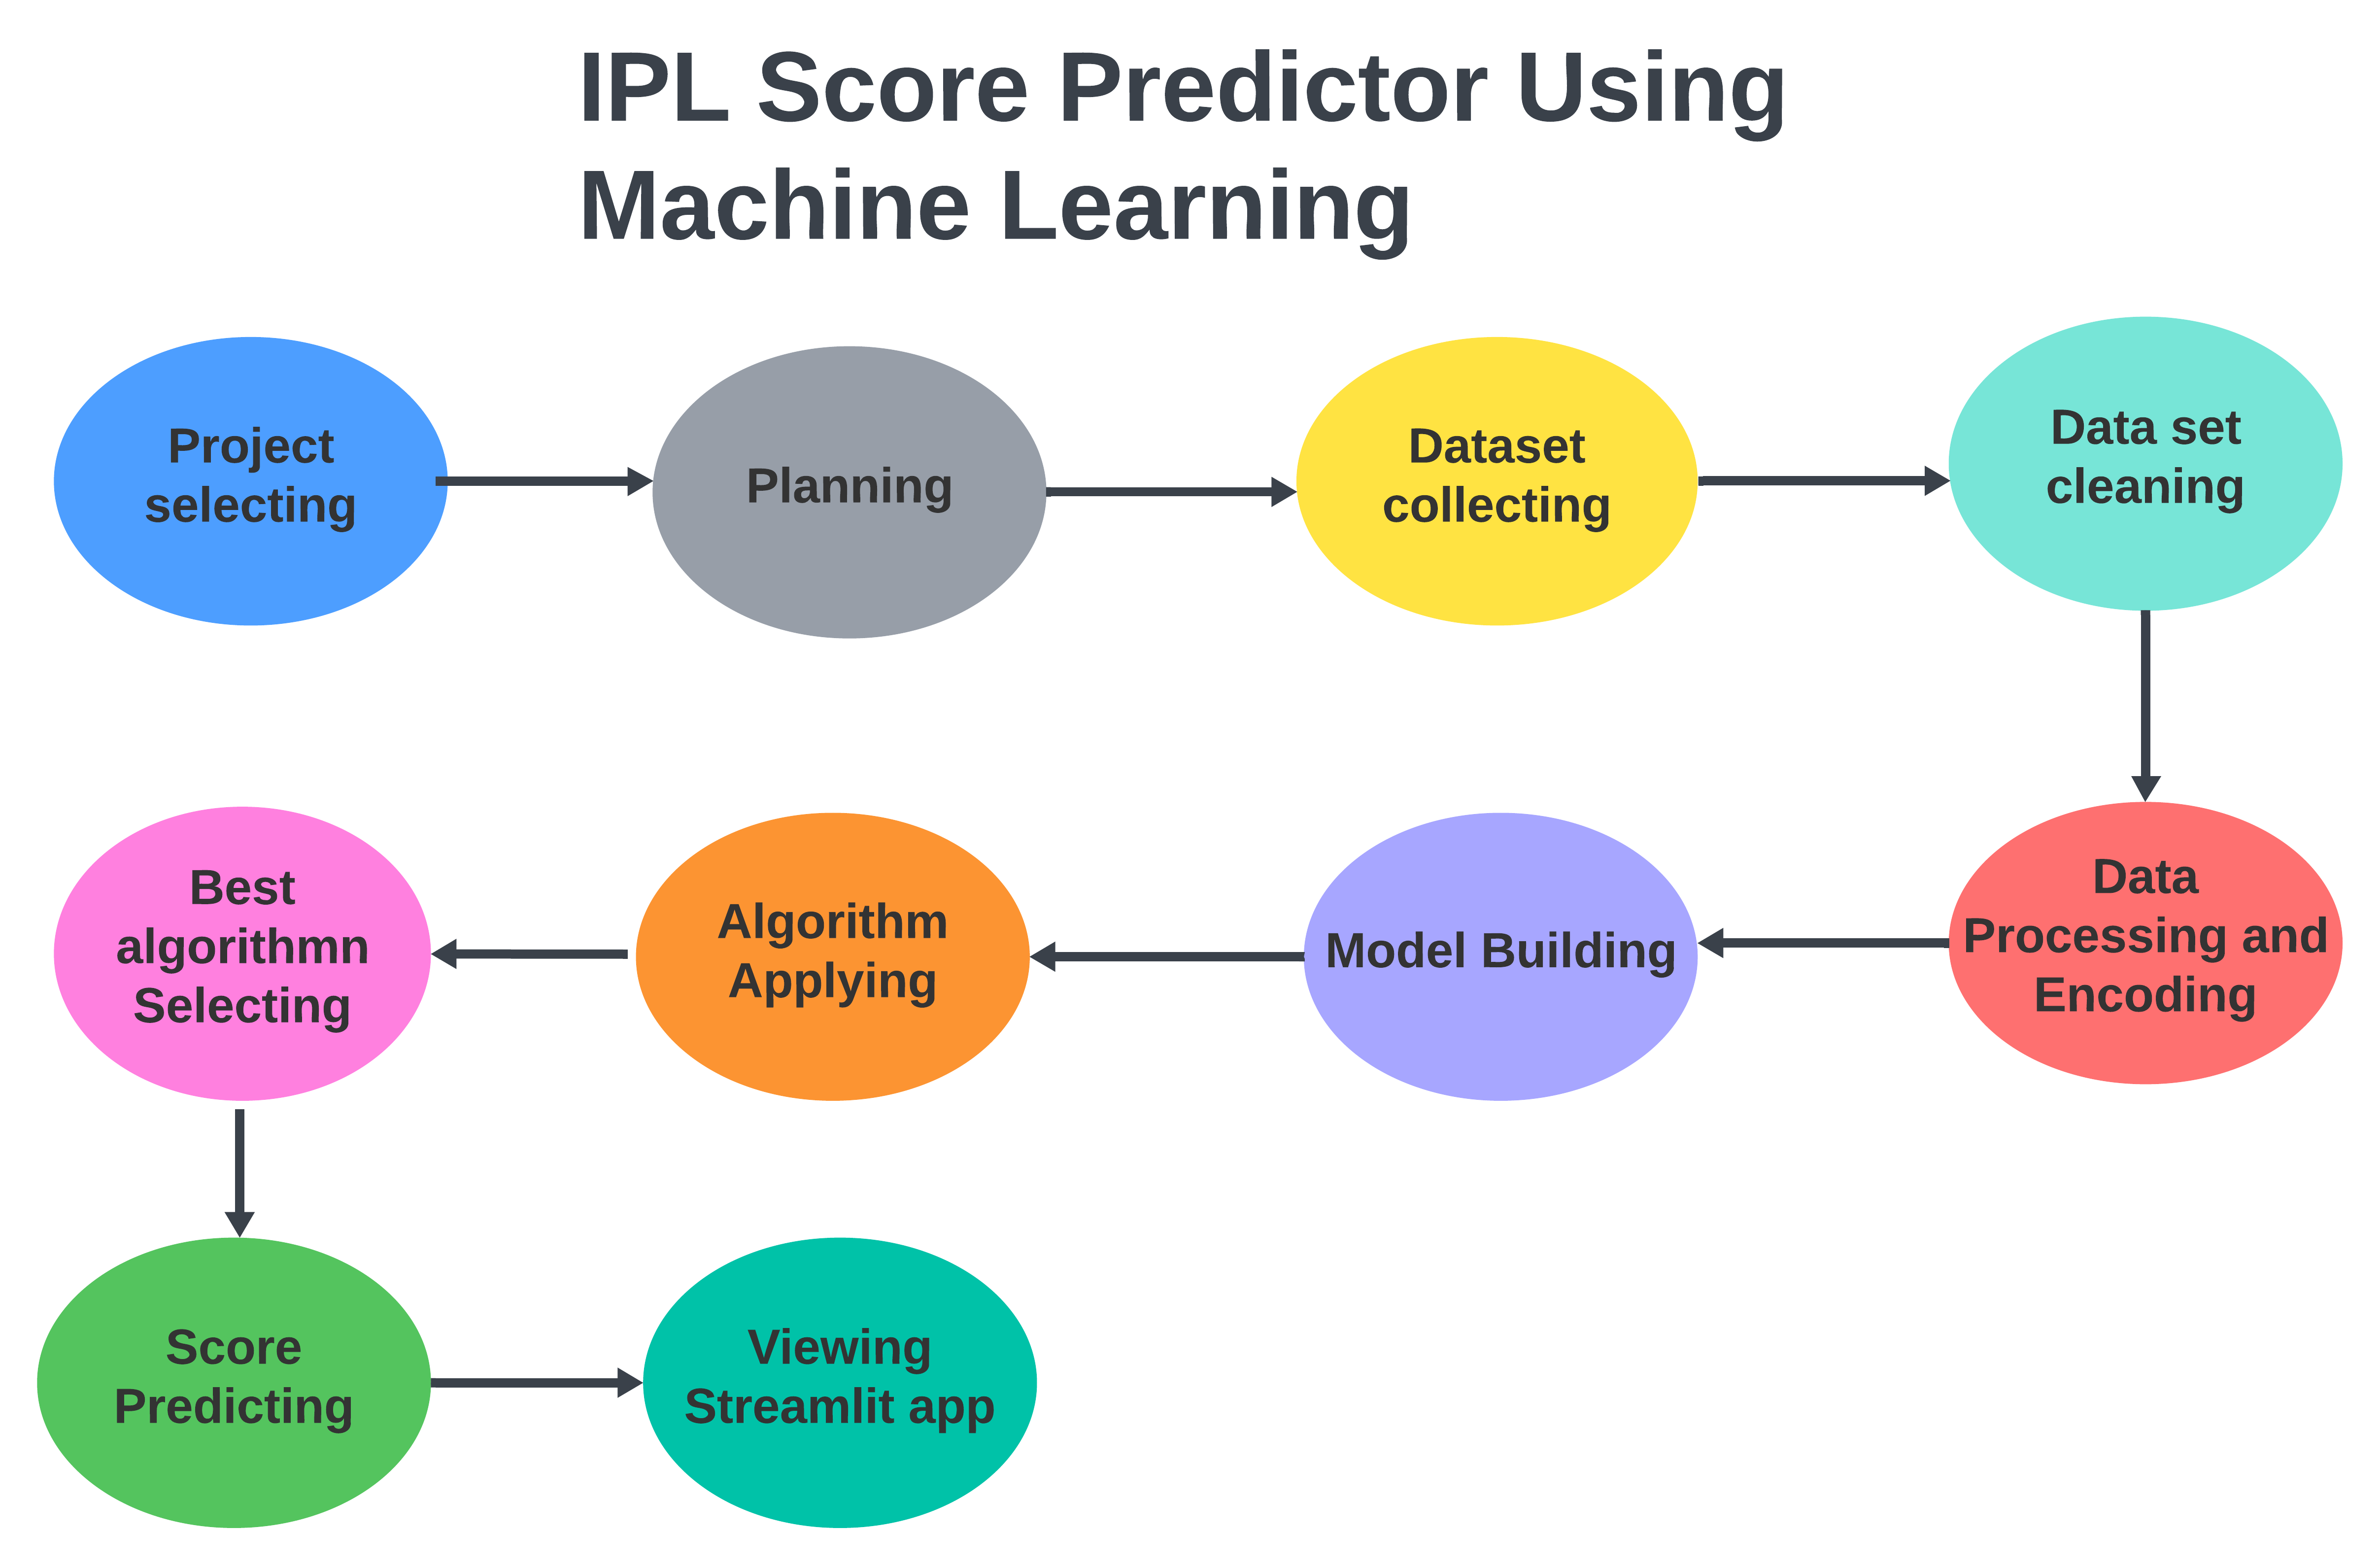

# Import Necessary Libraries

In [ ]:
# Importing Necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


Load the dataset

In [ ]:
#Importing dataset
ipl_df = pd.read_csv('ipl_data.csv')
print(f"Dataset successfully Imported of Shape : {ipl_df.shape}")

Dataset successfully Imported of Shape : (76014, 15)


# Exploratory Data Analysis

In [ ]:
# First 5 Columns Data
ipl_df.head()

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,1,0,0.1,1,0,0,0,222
1,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,1,0,0.2,1,0,0,0,222
2,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.2,2,0,0,0,222
3,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.3,2,0,0,0,222
4,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.4,2,0,0,0,222


In [ ]:
# Describing the ipl_dfset
ipl_df.describe()

,mid,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
count,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000
mean,308.627740,74.889349,2.415844,9.783068,33.216434,1.120307,24.962283,8.869287,160.901452
std,178.156878,48.823327,2.015207,5.772587,14.914174,1.053343,20.079752,10.795742,29.246231
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67.000000
25%,154.000000,34.000000,1.000000,4.600000,24.000000,0.000000,10.000000,1.000000,142.000000
50%,308.000000,70.000000,2.000000,9.600000,34.000000,1.000000,20.000000,5.000000,162.000000
75%,463.000000,111.000000,4.000000,14.600000,43.000000,2.000000,35.000000,13.000000,181.000000
max,617.000000,263.000000,10.000000,19.600000,113.000000,7.000000,175.000000,109.000000,263.000000


In [ ]:
# Information about Each Column
ipl_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76014 entries, 0 to 76013
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   mid             76014 non-null  int64  
 1   date            76014 non-null  object 
 2   venue           76014 non-null  object 
 3   bat_team        76014 non-null  object 
 4   bowl_team       76014 non-null  object 
 5   batsman         76014 non-null  object 
 6   bowler          76014 non-null  object 
 7   runs            76014 non-null  int64  
 8   wickets         76014 non-null  int64  
 9   overs           76014 non-null  float64
 10  runs_last_5     76014 non-null  int64  
 11  wickets_last_5  76014 non-null  int64  
 12  striker         76014 non-null  int64  
 13  non-striker     76014 non-null  int64  
 14  total           76014 non-null  int64  
dtypes: float64(1), int64(8), object(6)
memory usage: 8.7+ MB


In [ ]:
# Number of Unique Values in each column
ipl_df.nunique()

mid               617
date              442
venue              35
bat_team           14
bowl_team          14
batsman           411
bowler            329
runs              252
wickets            11
overs             140
runs_last_5       102
wickets_last_5      8
striker           155
non-striker        88
total             138
dtype: int64

In [ ]:
# ipl_df types of all Columns
ipl_df.dtypes

mid                 int64
date               object
venue              object
bat_team           object
bowl_team          object
batsman            object
bowler             object
runs                int64
wickets             int64
overs             float64
runs_last_5         int64
wickets_last_5      int64
striker             int64
non-striker         int64
total               int64
dtype: object

# Data Cleaning

#### Removing Irrelevant Data columns

In [ ]:
# Names of all columns
ipl_df.columns

Index(['mid', 'date', 'venue', 'bat_team', 'bowl_team', 'batsman', 'bowler',
       'runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5', 'striker',
       'non-striker', 'total'],
      dtype='object')

Here, we can see that columns _['mid', 'date', 'venue', 'batsman', 'bowler', 'striker', 'non-striker']_ won't provide any relevant information for our model to train.Because our model is to predict the overall a 20 overs score for a perticular team.So we really dont care about who the batsman is,who the bowler is ,who the striker end, non striker end and so on.

##Checking null values percentage of the data set

In [ ]:
percentage_null = ipl_df.isna().mean() * 100
print(percentage_null)

mid               0.0
date              0.0
venue             0.0
bat_team          0.0
bowl_team         0.0
batsman           0.0
bowler            0.0
runs              0.0
wickets           0.0
overs             0.0
runs_last_5       0.0
wickets_last_5    0.0
striker           0.0
non-striker       0.0
total             0.0
dtype: float64


##Checking duplicated values

In [ ]:
duplicates = ipl_df[ipl_df.duplicated()]
print(duplicates)


Empty DataFrame
Columns: [mid, date, venue, bat_team, bowl_team, batsman, bowler, runs, wickets, overs, runs_last_5, wickets_last_5, striker, non-striker, total]
Index: []


##Dropping Irrelevant columns from the dataset

In [ ]:
irrelevant = ['mid', 'date', 'venue','batsman', 'bowler', 'striker', 'non-striker']
print(f'Before Removing Irrelevant Columns : {ipl_df.shape}')
ipl_df = ipl_df.drop(irrelevant, axis=1) # Drop Irrelevant Columns
print(f'After Removing Irrelevant Columns : {ipl_df.shape}')
ipl_df.head()

Before Removing Irrelevant Columns : (76014, 15)
After Removing Irrelevant Columns : (76014, 8)


,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
0,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.1,1,0,222
1,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.2,1,0,222
2,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.2,2,0,222
3,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.3,2,0,222
4,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.4,2,0,222


##List of Unique Team

In [ ]:
 ipl_df['bat_team'].unique()


array(['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
       'Mumbai Indians', 'Deccan Chargers', 'Kings XI Punjab',
       'Royal Challengers Bangalore', 'Delhi Daredevils',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Rising Pune Supergiants', 'Gujarat Lions',
       'Rising Pune Supergiant'], dtype=object)

#### Keeping only Consistent Teams


In [ ]:
# Define Consistent Teams
const_teams = ['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
              'Mumbai Indians', 'Kings XI Punjab', 'Royal Challengers Bangalore',
              'Delhi Daredevils', 'Sunrisers Hyderabad']

In [ ]:
print(f'Before Separating Inconsistent Teams : {ipl_df.shape}')
ipl_df = ipl_df[(ipl_df['bat_team'].isin(const_teams)) & (ipl_df['bowl_team'].isin(const_teams))]
print(f'After Removing Irrelevant Columns : {ipl_df.shape}')
print(f"Consistent Teams : \n{ipl_df['bat_team'].unique()}")
ipl_df.head()

Before Separating Inconsistent Teams : (76014, 8)
After Removing Irrelevant Columns : (53811, 8)
Consistent Teams : 
['Kolkata Knight Riders' 'Chennai Super Kings' 'Rajasthan Royals'
 'Mumbai Indians' 'Kings XI Punjab' 'Royal Challengers Bangalore'
 'Delhi Daredevils' 'Sunrisers Hyderabad']


,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
0,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.1,1,0,222
1,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.2,1,0,222
2,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.2,2,0,222
3,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.3,2,0,222
4,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.4,2,0,222


Plotting a Correlation Matrix of current data

<ipython-input-81-8fde0e13fc28>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  heatmap(data=ipl_df.corr(), annot=True)


<Axes: >

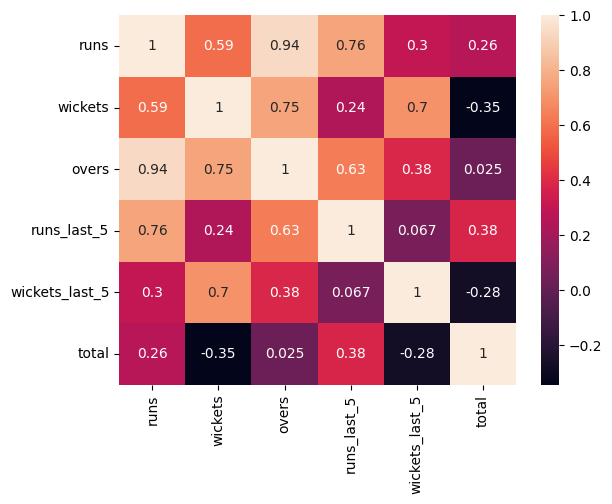

In [ ]:
from seaborn import heatmap
heatmap(data=ipl_df.corr(), annot=True)

# Data Preprocessing and Encoding

#### Performing Label Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
le = LabelEncoder()#This line creates an instance of the LabelEncoder class and assigns it to the variable le.
#The LabelEncoder is used to encode categorical labels with numerical values.
for col in ['bat_team', 'bowl_team']:
  ipl_df[col] = le.fit_transform(ipl_df[col])
ipl_df.head(15)

,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
0,3,6,1,0,0.1,1,0,222
1,3,6,1,0,0.2,1,0,222
2,3,6,2,0,0.2,2,0,222
3,3,6,2,0,0.3,2,0,222
4,3,6,2,0,0.4,2,0,222
5,3,6,2,0,0.5,2,0,222
6,3,6,3,0,0.6,3,0,222
7,3,6,3,0,1.1,3,0,222
8,3,6,7,0,1.2,7,0,222
9,3,6,11,0,1.3,11,0,222


#### Performing One Hot Encoding and Column Transformation

In [ ]:
from sklearn.compose import ColumnTransformer
#ColumnTransformer is a useful tool for applying different transformers to different columns of a pandas DataFrame.
columnTransformer = ColumnTransformer([('encoder',
                                        OneHotEncoder(),
                                        [0, 1])],
                                      remainder='passthrough')

In [ ]:
ipl_df = np.array(columnTransformer.fit_transform(ipl_df))
ipl_df

array([[  0.,   0.,   0., ...,   1.,   0., 222.],
       [  0.,   0.,   0., ...,   1.,   0., 222.],
       [  0.,   0.,   0., ...,   2.,   0., 222.],
       ...,
       [  0.,   0.,   0., ...,  28.,   4., 107.],
       [  0.,   0.,   0., ...,  24.,   4., 107.],
       [  0.,   0.,   0., ...,  23.,   5., 107.]])

Save the Numpy Array in a new DataFrame with transformed columns

In [ ]:
cols = ['batting_team_Chennai Super Kings', 'batting_team_Delhi Daredevils', 'batting_team_Kings XI Punjab',
              'batting_team_Kolkata Knight Riders', 'batting_team_Mumbai Indians', 'batting_team_Rajasthan Royals',
              'batting_team_Royal Challengers Bangalore', 'batting_team_Sunrisers Hyderabad',
              'bowling_team_Chennai Super Kings', 'bowling_team_Delhi Daredevils', 'bowling_team_Kings XI Punjab',
              'bowling_team_Kolkata Knight Riders', 'bowling_team_Mumbai Indians', 'bowling_team_Rajasthan Royals',
              'bowling_team_Royal Challengers Bangalore', 'bowling_team_Sunrisers Hyderabad', 'runs', 'wickets', 'overs',
       'runs_last_5', 'wickets_last_5', 'total']
df = pd.DataFrame(ipl_df, columns=cols)

In [ ]:
# Encoded Data
df.head()

,batting_team_Chennai Super Kings,batting_team_Delhi Daredevils,batting_team_Kings XI Punjab,batting_team_Kolkata Knight Riders,batting_team_Mumbai Indians,batting_team_Rajasthan Royals,batting_team_Royal Challengers Bangalore,batting_team_Sunrisers Hyderabad,bowling_team_Chennai Super Kings,bowling_team_Delhi Daredevils,...,bowling_team_Mumbai Indians,bowling_team_Rajasthan Royals,bowling_team_Royal Challengers Bangalore,bowling_team_Sunrisers Hyderabad,runs,wickets,overs,runs_last_5,wickets_last_5,total
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.1,1.0,0.0,222.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.2,1.0,0.0,222.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,2.0,0.0,0.2,2.0,0.0,222.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,2.0,0.0,0.3,2.0,0.0,222.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,2.0,0.0,0.4,2.0,0.0,222.0


# Model Building

## Prepare Train and Test Data

In [ ]:
features = df.drop(['total'], axis=1)
labels = df['total']

In [ ]:
from sklearn.model_selection import train_test_split
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size=0.20, shuffle=True)##
print(f"Training Set : {train_features.shape}\nTesting Set : {test_features.shape}")

Training Set : (43048, 21)
Testing Set : (10763, 21)


## ML  Algorithms

In [ ]:
models = dict() # models is an empty dictionary here. Actually its a container for storing various models info.

#### 1. Decision Tree Regressor

In [ ]:
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor()
# Train Model
tree.fit(train_features, train_labels)


DecisionTreeRegressor()

In [ ]:
# Evaluate Model
train_score_tree = float(tree.score(train_features, train_labels) * 100)
test_score_tree = float(tree.score(test_features, test_labels) * 100)
# print(f'Train Score : {train_score_tree[:5]}%\nTest Score : {test_score_tree[:5]}%')
models["tree"] = test_score_tree
print(train_score_tree)
print(test_score_tree)

97.3164849962634
64.94318030170399


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
print("---- Decision Tree Regressor - Model Evaluation ----")
print("Mean Absolute Error (MAE): {}".format(mean_absolute_error(test_labels, tree.predict(test_features))))
print("Mean Squared Error (MSE): {}".format(mean_squared_error(test_labels, tree.predict(test_features))))
print("Root Mean Squared Error (RMSE): {}".format(np.sqrt(mean_squared_error(test_labels, tree.predict(test_features)))))


---- Decision Tree Regressor - Model Evaluation ----
Mean Absolute Error (MAE): 7.271634302703708
Mean Squared Error (MSE): 312.72495760940257
Root Mean Squared Error (RMSE): 17.684031147037786


#### Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
linreg = LinearRegression()
# Train Model
linreg.fit(train_features, train_labels)

LinearRegression()

In [ ]:
# Evaluate Model
train_score_linreg = float(linreg.score(train_features, train_labels) * 100)
test_score_linreg = float(linreg.score(test_features, test_labels) * 100)

models["linreg"] = test_score_linreg
print(train_score_linreg)
print(test_score_linreg)


52.892210840523205
52.50667284204027


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
print("---- Linear  Regressor - Model Evaluation ----")
print("Mean Absolute Error (MAE): {}".format(mean_absolute_error(test_labels, linreg.predict(test_features))))
print("Mean Squared Error (MSE): {}".format(mean_squared_error(test_labels, linreg.predict(test_features))))
print("Root Mean Squared Error (RMSE): {}".format(np.sqrt(mean_squared_error(test_labels, linreg.predict(test_features)))))

---- Linear  Regressor - Model Evaluation ----
Mean Absolute Error (MAE): 15.233508407513682
Mean Squared Error (MSE): 423.66503436489324
Root Mean Squared Error (RMSE): 20.583124990265528


#### Random Forest Regression

In [ ]:
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor()
# Train Model
forest.fit(train_features, train_labels)



RandomForestRegressor()

In [ ]:
# Evaluate Model
train_score_forest = float(forest.score(train_features, train_labels)*100)
test_score_forest = float(forest.score(test_features, test_labels)*100)

models["forest"] = test_score_forest
print(train_score_forest)
print(test_score_forest )

95.44225267536862
79.53234476141814


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
print("---- Random Forest Regressor - Model Evaluation ----")
print("Mean Absolute Error (MAE): {}".format(mean_absolute_error(test_labels, forest.predict(test_features))))
print("Mean Squared Error (MSE): {}".format(mean_squared_error(test_labels, forest.predict(test_features))))
print("Root Mean Squared Error (RMSE): {}".format(np.sqrt(mean_squared_error(test_labels, forest.predict(test_features)))))



---- Random Forest Regressor - Model Evaluation ----
Mean Absolute Error (MAE): 7.2872344255309045
Mean Squared Error (MSE): 182.5820673961619
Root Mean Squared Error (RMSE): 13.512293195315216


## Best Model

Text(0, 0.5, 'Accuracy Score')

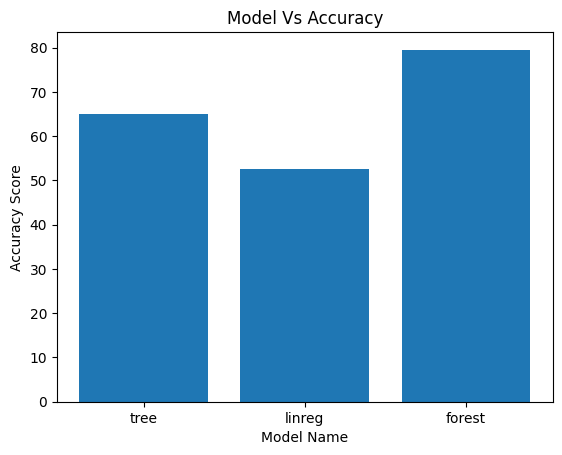

In [ ]:
import matplotlib.pyplot as plt
model_names = list(models.keys())
accuracy = list(map(float, models.values()))
# creating the bar plot
plt.bar(model_names, accuracy)
plt.title('Model Vs Accuracy')
plt.xlabel('Model Name');
plt.ylabel('Accuracy Score')

From above, we can see that **Random Forest** performed the best, closely followed by **Decision Tree**. So we will be choosing Random Forest for the final model

# Predictions

In [ ]:
def score_predict(batting_team, bowling_team, runs, wickets, overs, runs_last_5, wickets_last_5, model=forest):
  prediction_array = []
  # Batting Team
  if batting_team == 'Chennai Super Kings':
    prediction_array = prediction_array + [1,0,0,0,0,0,0,0]
  elif batting_team == 'Delhi Daredevils':
    prediction_array = prediction_array + [0,1,0,0,0,0,0,0]
  elif batting_team == 'Kings XI Punjab':
    prediction_array = prediction_array + [0,0,1,0,0,0,0,0]
  elif batting_team == 'Kolkata Knight Riders':
    prediction_array = prediction_array + [0,0,0,1,0,0,0,0]
  elif batting_team == 'Mumbai Indians':
    prediction_array = prediction_array + [0,0,0,0,1,0,0,0]
  elif batting_team == 'Rajasthan Royals':
    prediction_array = prediction_array + [0,0,0,0,0,1,0,0]
  elif batting_team == 'Royal Challengers Bangalore':
    prediction_array = prediction_array + [0,0,0,0,0,0,1,0]
  elif batting_team == 'Sunrisers Hyderabad':
    prediction_array = prediction_array + [0,0,0,0,0,0,0,1]
  # Bowling Team
  if bowling_team == 'Chennai Super Kings':
    prediction_array = prediction_array + [1,0,0,0,0,0,0,0]
  elif bowling_team == 'Delhi Daredevils':
    prediction_array = prediction_array + [0,1,0,0,0,0,0,0]
  elif bowling_team == 'Kings XI Punjab':
    prediction_array = prediction_array + [0,0,1,0,0,0,0,0]
  elif bowling_team == 'Kolkata Knight Riders':
    prediction_array = prediction_array + [0,0,0,1,0,0,0,0]
  elif bowling_team == 'Mumbai Indians':
    prediction_array = prediction_array + [0,0,0,0,1,0,0,0]
  elif bowling_team == 'Rajasthan Royals':
    prediction_array = prediction_array + [0,0,0,0,0,1,0,0]
  elif bowling_team == 'Royal Challengers Bangalore':
    prediction_array = prediction_array + [0,0,0,0,0,0,1,0]
  elif bowling_team == 'Sunrisers Hyderabad':
    prediction_array = prediction_array + [0,0,0,0,0,0,0,1]
  prediction_array = prediction_array + [runs, wickets, overs, runs_last_5, wickets_last_5]
  prediction_array = np.array([prediction_array])
  pred = model.predict(prediction_array)
  return int(round(pred[0]))## round function rounds the predicted value to the nearest integer.

### Test 1
- Batting Team : **Delhi Daredevils**
- Bowling Team : **Chennai Super Kings**
- Final Score : **147/9**

In [ ]:
batting_team = 'Delhi Daredevils'
bowling_team = 'Chennai Super Kings'
actual_score = 147
features = {'overs': 10.2, 'runs': 68, 'wickets': 3, 'runs_last_5': 29, 'wickets_last_5': 1}

predicted_score = score_predict(batting_team, bowling_team, **features)## **features represents the dictionary here

# accuracy percentage
accuracy_percentage = (1 - abs(predicted_score - actual_score) / actual_score) * 100

print(f'Predicted Score: {predicted_score} || Actual Score: {actual_score}')
print(f'Prediction Accuracy: {accuracy_percentage:.2f}%')


Predicted Score: 148 || Actual Score: 147
Prediction Accuracy: 99.32%


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


### Test 2
- Batting Team : **Mumbai Indians**
- Bowling Team : **Kings XI Punjab**
- Final Score : **176/7**

In [ ]:
batting_team='Mumbai Indians'
bowling_team='Kings XI Punjab'
actual_score=176
features = {'overs': 12.3, 'runs': 113, 'wickets': 2, 'runs_last_5': 55, 'wickets_last_5': 0}


predicted_score = score_predict(batting_team, bowling_team, **features)


# accuracy percentage
accuracy_percentage = (1 - abs(predicted_score - actual_score) / actual_score) * 100


print(f'Predicted Score : {predicted_score} || Actual Score : 176')
print(f'Prediction Accuracy: {accuracy_percentage:.2f}%')




Predicted Score : 189 || Actual Score : 176
Prediction Accuracy: 92.61%


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


### Test 3
- Batting Team : **Kings XI Punjab**
- Bowling Team : **Rajasthan Royals**
- Final Score : **185/4**
<br/>
These Test Was done before the match and final score were added later.

In [ ]:
batting_team="Kings XI Punjab"
bowling_team="Rajasthan Royals"
actual_score=185
features = {'overs': 14.0, 'runs': 118, 'wickets': 1, 'runs_last_5': 45, 'wickets_last_5': 0}

predicted_score = score_predict(batting_team, bowling_team, **features)


# accuracy percentage
accuracy_percentage = (1 - abs(predicted_score - actual_score) / actual_score) * 100


print(f'Predicted Score : {predicted_score} || Actual Score : 185')
print(f'Prediction Accuracy: {accuracy_percentage:.2f}%')

Predicted Score : 178 || Actual Score : 185
Prediction Accuracy: 96.22%


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


### Test 4
- Batting Team : **Kolkata Knight Riders**
- Bowling Team : **Chennai Super Kings**
- Final Score : **172/5**

In [ ]:
batting_team="Kolkata Knight Riders"
bowling_team="Chennai Super Kings"
actual_score = 172
features = {'overs': 18.0, 'runs': 150, 'wickets': 4, 'runs_last_5': 57, 'wickets_last_5': 1}


predicted_score = score_predict(batting_team, bowling_team, **features)


#accuracy percentage
accuracy_percentage = (1 - abs(predicted_score - actual_score) / actual_score) * 100


print(f'Predicted Score : {predicted_score} || Actual Score : 172')
print(f'Prediction Accuracy: {accuracy_percentage:.2f}%')

Predicted Score : 174 || Actual Score : 172
Prediction Accuracy: 98.84%


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


### Test 5
- Batting Team : **Delhi Daredevils**
- Bowling Team : **Mumbai Indians**
- Final Score : **110/7**

In [ ]:
batting_team='Delhi Daredevils'
bowling_team='Mumbai Indians'
actual_score = 110
features = {'overs': 18.0, 'runs': 96, 'wickets': 8, 'runs_last_5': 18, 'wickets_last_5': 4}


predicted_score = score_predict(batting_team, bowling_team, **features)

#accuracy percentage
accuracy_percentage = (1 - abs(predicted_score - actual_score) / actual_score) * 100

print(f'Predicted Score : {predicted_score} || Actual Score : 110')
print(f'Prediction Accuracy: {accuracy_percentage:.2f}%')

Predicted Score : 105 || Actual Score : 110
Prediction Accuracy: 95.45%


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


### Test 6
- Batting Team : **Sunrisers Hyderabad**
- Bowling Team : **Royal Challengers Banglore**
- Final Score : **146/10**

In [ ]:
batting_team='Sunrisers Hyderabad'
bowling_team='Royal Challengers Bangalore'
actual_score = 146
features = {'overs': 10.5, 'runs': 67, 'wickets': 3, 'runs_last_5': 29, 'wickets_last_5': 1}


predicted_score = score_predict(batting_team, bowling_team, **features)

#accuracy percentage
accuracy_percentage = (1 - abs(predicted_score - actual_score) / actual_score) * 100

print(f'Predicted Score : {predicted_score} || Actual Score : 146')
print(f'Prediction Accuracy: {accuracy_percentage:.2f}%')

Predicted Score : 153 || Actual Score : 146
Prediction Accuracy: 95.21%


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


# Export Model

In [ ]:
import pickle
filename = "ml_model.pkl"
pickle.dump(forest, open(filename, "wb"))

##Streamlit app

In [ ]:
#import the libraries

# %%writefile app.py
import math
import numpy as np
import pickle
import streamlit as st

#SET PAGE WIDE
st.set_page_config(page_title='IPL_Score_Predictor',layout="centered")

#Get the ML model

filename='ml_model.pkl'
model = pickle.load(open(filename,'rb'))

#Title of the page with CSS

st.markdown("<h1 style='text-align: center; color: white;'> IPL Score Predictor Using machine Learning </h1>", unsafe_allow_html=True)

#Add background image

st.markdown(
         f"""
         <style>
         .stApp {{
             background-image: url("https://images.app.goo.gl/r8nLcL7P42s4kqm46");
             background-attachment: fixed;
             background-size: cover
         }}
         </style>
         """,
         unsafe_allow_html=True
     )

#Add description

with st.expander("Description"):
    st.info("""A Simple ML Model to predict IPL Scores between teams in an ongoing match. To make sure the model results accurate score and some reliability the minimum no. of current overs considered is greater than 5 overs.

 """)

# SELECT THE BATTING TEAM


batting_team= st.selectbox('Select the Batting Team ',('Chennai Super Kings', 'Delhi Daredevils', 'Kings XI Punjab','Kolkata Knight Riders','Mumbai Indians','Rajasthan Royals','Royal Challengers Bangalore','Sunrisers Hyderabad'))

prediction_array = []
  # Batting Team
if batting_team == 'Chennai Super Kings':
    prediction_array = prediction_array + [1,0,0,0,0,0,0,0]
elif batting_team == 'Delhi Daredevils':
    prediction_array = prediction_array + [0,1,0,0,0,0,0,0]
elif batting_team == 'Kings XI Punjab':
    prediction_array = prediction_array + [0,0,1,0,0,0,0,0]
elif batting_team == 'Kolkata Knight Riders':
    prediction_array = prediction_array + [0,0,0,1,0,0,0,0]
elif batting_team == 'Mumbai Indians':
    prediction_array = prediction_array + [0,0,0,0,1,0,0,0]
elif batting_team == 'Rajasthan Royals':
    prediction_array = prediction_array + [0,0,0,0,0,1,0,0]
elif batting_team == 'Royal Challengers Bangalore':
    prediction_array = prediction_array + [0,0,0,0,0,0,1,0]
elif batting_team == 'Sunrisers Hyderabad':
    prediction_array = prediction_array + [0,0,0,0,0,0,0,1]

#SELECT BOWLING TEAM

bowling_team = st.selectbox('Select the Bowling Team ',('Chennai Super Kings', 'Delhi Daredevils', 'Kings XI Punjab','Kolkata Knight Riders','Mumbai Indians','Rajasthan Royals','Royal Challengers Bangalore','Sunrisers Hyderabad'))
if bowling_team==batting_team:
    st.error('Bowling and Batting teams should be different')
# Bowling Team
if bowling_team == 'Chennai Super Kings':
    prediction_array = prediction_array + [1,0,0,0,0,0,0,0]
elif bowling_team == 'Delhi Daredevils':
    prediction_array = prediction_array + [0,1,0,0,0,0,0,0]
elif bowling_team == 'Kings XI Punjab':
    prediction_array = prediction_array + [0,0,1,0,0,0,0,0]
elif bowling_team == 'Kolkata Knight Riders':
    prediction_array = prediction_array + [0,0,0,1,0,0,0,0]
elif bowling_team == 'Mumbai Indians':
    prediction_array = prediction_array + [0,0,0,0,1,0,0,0]
elif bowling_team == 'Rajasthan Royals':
    prediction_array = prediction_array + [0,0,0,0,0,1,0,0]
elif bowling_team == 'Royal Challengers Bangalore':
    prediction_array = prediction_array + [0,0,0,0,0,0,1,0]
elif bowling_team == 'Sunrisers Hyderabad':
    prediction_array = prediction_array + [0,0,0,0,0,0,0,1]


col1, col2 = st.columns(2)

#Enter the Current Ongoing Over
with col1:
    overs = st.number_input('Enter the Current Over',min_value=5.1,max_value=19.5,value=5.1,step=0.1)
    if overs-math.floor(overs)>0.5:
        st.error('Please enter valid over input as one over only contains 6 balls')
with col2:
#Enter Current Run
    runs = st.number_input('Enter Current runs',min_value=0,max_value=354,step=1,format='%i')


#Wickets Taken till now
wickets =st.slider('Enter Wickets fallen till now',0,9)
wickets=int(wickets)

col3, col4 = st.columns(2)

with col3:
#Runs in last 5 over
    runs_in_prev_5 = st.number_input('Runs scored in the last 5 overs',min_value=0,max_value=runs,step=1,format='%i')

with col4:
#Wickets in last 5 over
    wickets_in_prev_5 = st.number_input('Wickets taken in the last 5 overs',min_value=0,max_value=wickets,step=1,format='%i')

#Get all the data for predicting

prediction_array = prediction_array + [runs, wickets, overs, runs_in_prev_5,wickets_in_prev_5]
prediction_array = np.array([prediction_array])
predict = model.predict(prediction_array)


if st.button('Predict Score'):
    #Call the ML Model
    my_prediction = int(round(predict[0]))

    #Display the predicted Score Range
    x=f'PREDICTED MATCH SCORE : {my_prediction-5} to {my_prediction+5}'
    st.success(x)


In [ ]:
! pip install streamlit -q

In [ ]:
!wget -q -O - ipv4.icanhazip.com

34.106.50.201


In [ ]:
! streamlit run app.py & npx localtunnel --port 8501